In [24]:
import pandas as pd
import seaborn as sns
import altair as alt
import matplotlib.pyplot as plt


sns.set()

In [25]:
df = pd.read_csv('CSV.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df.select_dtypes(include=['float64'])

In [26]:
close = df['Close']
close_rol = close.rolling(window=7).mean()
close_rol

Date
2020-05-26          NaN
2020-05-27          NaN
2020-05-28          NaN
2020-05-29          NaN
2020-06-01          NaN
                ...    
2021-05-17    37.620000
2021-05-18    37.448571
2021-05-19    37.387143
2021-05-20    37.501428
2021-05-21    37.740000
Name: Close, Length: 251, dtype: float64

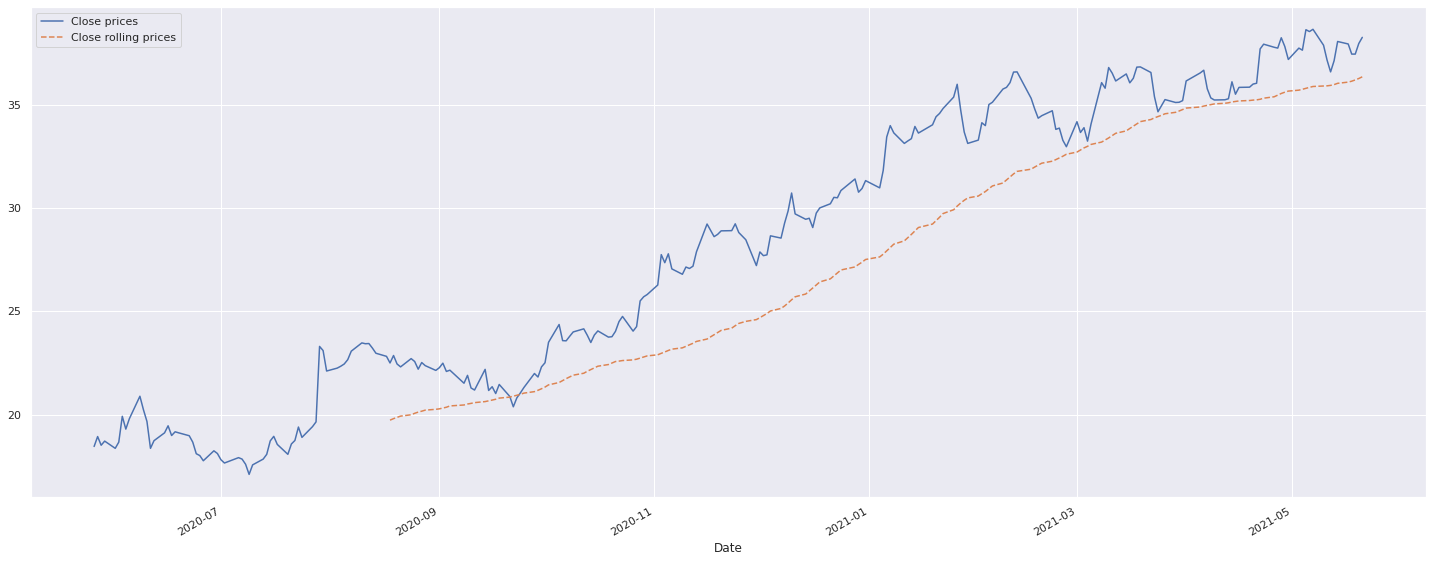

In [30]:
close.plot()
close_rol.plot(style='--', figsize = (25, 10))
plt.legend(labels=['Close prices', 'Close rolling prices']);

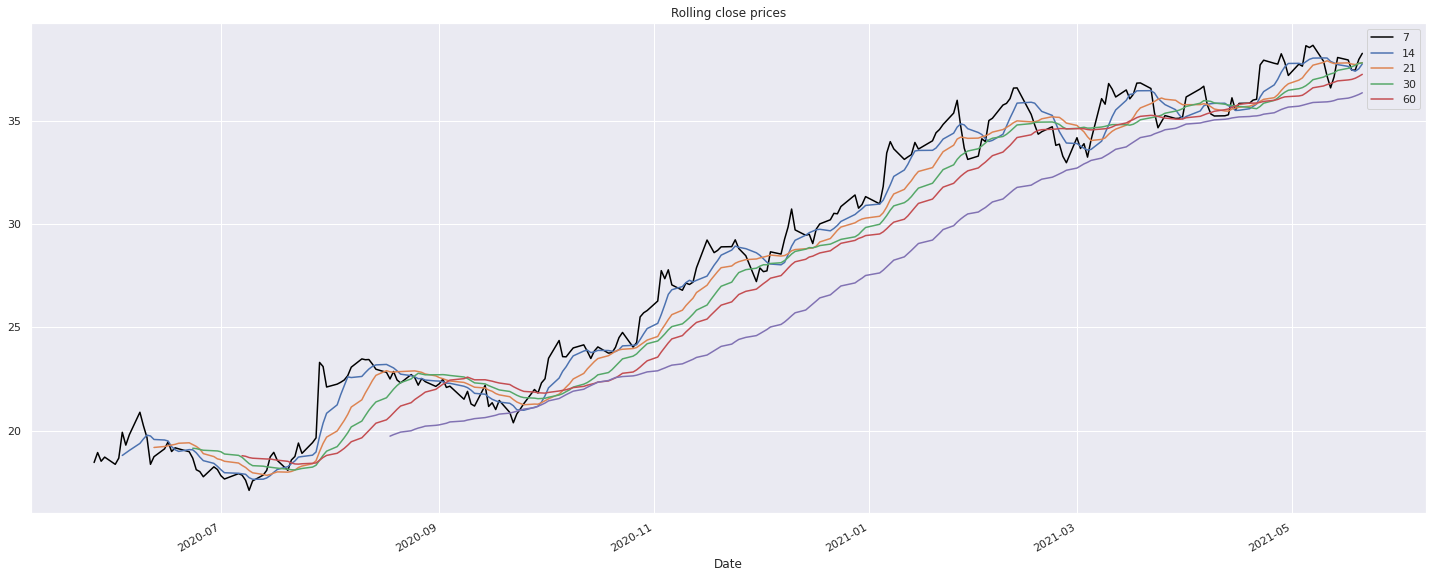

In [31]:
close.plot(color='black')
for i in [7, 14, 21, 30, 60]:
    close_rol = close.rolling(window=i).mean()
    close_rol.plot(figsize = (25, 10))

plt.legend(labels=[7, 14, 21, 30, 60])
plt.title('Rolling close prices');

In [32]:
df1 = pd.DataFrame(close_rol)
df1 = df1.merge(df['Close'], left_index=True, right_index=True)
df1.columns = ['Close rolling prices', 'Close prices']

chart2 = alt.Chart(df1.reset_index()).mark_line().encode(
    x='Date:T'
    ).properties(
        width=900, 
        height=300)

alt.layer(
    chart2.mark_line(color='blue').encode(y='Close prices'),
    chart2.mark_line(color='orange').encode(y='Close rolling prices'),
).interactive()

alt.LayerChart(...)